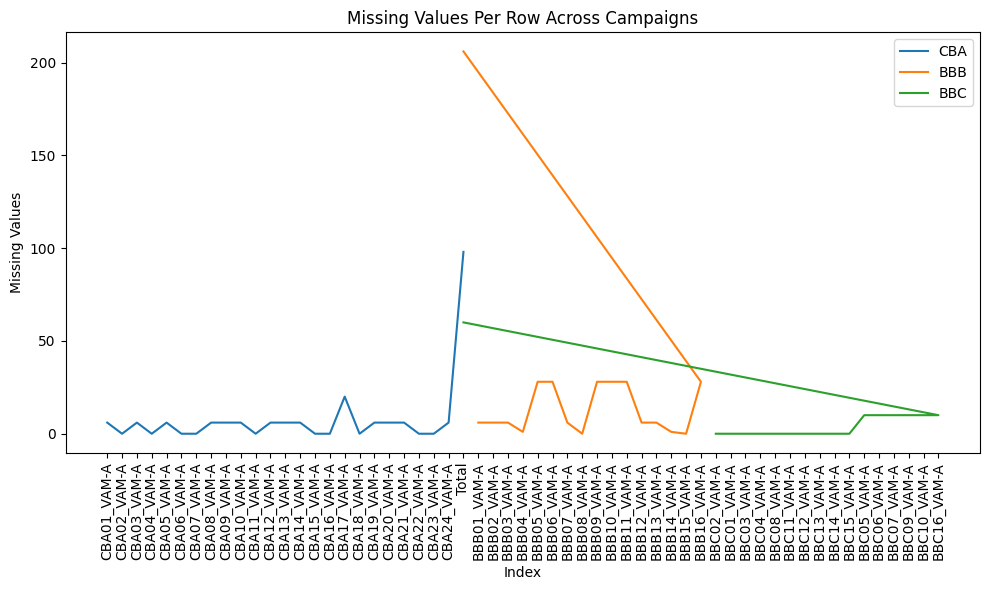

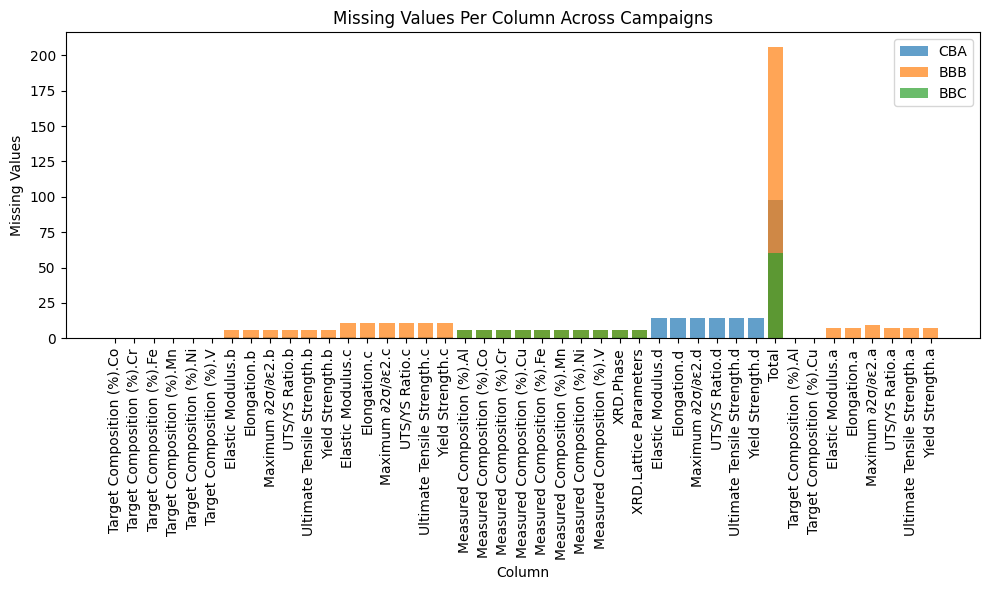

Combined Missing Values Per Row Across Campaigns:
          Index  Missing Values Campaign
0   CBA01_VAM-A               6      CBA
1   CBA02_VAM-A               0      CBA
2   CBA03_VAM-A               6      CBA
3   CBA04_VAM-A               0      CBA
4   CBA05_VAM-A               6      CBA
5   CBA06_VAM-A               0      CBA
6   CBA07_VAM-A               0      CBA
7   CBA08_VAM-A               6      CBA
8   CBA09_VAM-A               6      CBA
9   CBA10_VAM-A               6      CBA
10  CBA11_VAM-A               0      CBA
11  CBA12_VAM-A               6      CBA
12  CBA13_VAM-A               6      CBA
13  CBA14_VAM-A               6      CBA
14  CBA15_VAM-A               0      CBA
15  CBA16_VAM-A               0      CBA
16  CBA17_VAM-A              20      CBA
17  CBA18_VAM-A               0      CBA
18  CBA19_VAM-A               6      CBA
19  CBA20_VAM-A               6      CBA
20  CBA21_VAM-A               6      CBA
21  CBA22_VAM-A               0      CBA
22  CBA

In [ ]:
from girder_client import GirderClient
import os
import pandas as pd
import birdshot2
import matplotlib.pyplot as plt

client = GirderClient(apiUrl="https://data.htmdec.org/api/v1")
client.authenticate(apiKey="MFfpVN81hmOaUV7cTGsovnzdr0iB87ygR0RxkDYA")

# List of campaigns to analyze
campaigns = ['CBA', 'BBB', 'BBC']  # Add more campaigns as needed

# Initialize DataFrames to store results across campaigns
all_missing_per_row = []
all_missing_per_column = []

# Loop through each campaign and calculate missing values
for campaign in campaigns:
    # Query the data for the given campaign
    df = birdshot2.query(campaign=campaign, client=client)
    
    # Table 1: Count missing values per row
    missing_per_row = df.isna().sum(axis=1).reset_index()
    missing_per_row.columns = ['Index', 'Missing Values']
    missing_per_row['Campaign'] = campaign  # Add campaign identifier
    all_missing_per_row.append(missing_per_row)
    
    # Table 2: Count missing values per column
    missing_per_column = df.isna().sum(axis=0).reset_index()
    missing_per_column.columns = ['Column', 'Missing Values']
    missing_per_column['Campaign'] = campaign  # Add campaign identifier
    all_missing_per_column.append(missing_per_column)

# Combine results from all campaigns into a single DataFrame
combined_missing_per_row = pd.concat(all_missing_per_row, ignore_index=True)
combined_missing_per_column = pd.concat(all_missing_per_column, ignore_index=True)

# Add totals for each campaign (for rows and columns)
row_totals = combined_missing_per_row.groupby('Campaign')['Missing Values'].sum().reset_index()
row_totals['Index'] = 'Total'  # Label it as 'Total'
combined_missing_per_row = pd.concat([combined_missing_per_row, row_totals], ignore_index=True)

column_totals = combined_missing_per_column.groupby('Campaign')['Missing Values'].sum().reset_index()
column_totals['Column'] = 'Total'  # Label it as 'Total'
combined_missing_per_column = pd.concat([combined_missing_per_column, column_totals], ignore_index=True)

# # Visualize results: Missing values per row (grouped by campaign)
# plt.figure(figsize=(10, 6))
# for campaign in campaigns:
#     campaign_data = combined_missing_per_row[combined_missing_per_row['Campaign'] == campaign]
#     plt.plot(campaign_data['Index'], campaign_data['Missing Values'], label=campaign)

# plt.title("Missing Values Per Row Across Campaigns")
# plt.xlabel("Index")
# plt.ylabel("Missing Values")
# plt.legend()
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

# # Visualize results: Missing values per column (grouped by campaign)
# plt.figure(figsize=(10, 6))
# for campaign in campaigns:
#     campaign_data = combined_missing_per_column[combined_missing_per_column['Campaign'] == campaign]
#     plt.bar(campaign_data['Column'], campaign_data['Missing Values'], label=campaign, alpha=0.7)

# plt.title("Missing Values Per Column Across Campaigns")
# plt.xlabel("Column")
# plt.ylabel("Missing Values")
# plt.legend()
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

# Print the combined tables
print("Combined Missing Values Per Row Across Campaigns:")
print(combined_missing_per_row)

print("\nCombined Missing Values Per Column Across Campaigns:")
print(combined_missing_per_column)